### Using the interquartile range:

#### Quartile Range (QR):
Quartiles are a type of quantile that divides an ordered data set into four equal parts. They provide information about the distribution of the data, specifically the spread and location of values.

There are three main quartiles:

First Quartile (Q1): Also known as the 25th percentile, it represents the value at which 25% of the data falls below it and 75% falls above it.
Median (Q2): The middle value of the data set when ordered from smallest to largest. It represents the 50th percentile, with 50% of the data falling below it and 50% above it.
Third Quartile (Q3): Also known as the 75th percentile, it represents the value at which 75% of the data falls below it and 25% falls above it.
    
##### Interquartile Range (IQR):

The interquartile range (IQR) is a measure of variability in the data calculated using quartiles. It represents the range that covers the middle 50% of the data:

##### IQR = Q3 - Q1
The IQR is less sensitive to outliers compared to the full range (highest value - lowest value) because it excludes the extreme ends of the data distribution.

Understanding Quartiles and IQR helps you:

Visualize the distribution: By knowing the quartiles and IQR, you can create box plots, which graphically depict the spread of the data based on these values.
Identify outliers: Data points falling far outside the range defined by Q1 and Q3 (typically beyond 1.5 times the IQR) might be considered outliers.
Compare data sets: You can compare the quartiles and IQR of different data sets to understand how their central tendencies and spreads differ.

so is, all the values lies outside Q1-1.5 IQR or above Q3 + 1.5 IQR are outliers

#### skewed distribution:
It is a non-symmetrical distribution of data points where one tail extends further than the other. It differs from a normal distribution (bell curve) where data is clustered around the center with equal tails on either side.

id we are working on IQR then the districbution should be skewed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Scholarship.csv')

In [4]:
df=data.copy()

In [6]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


C:\Users\majhi\AppData\Local\Temp\ipykernel_10480\1091053234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])   #shows it is a skewed distribution
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

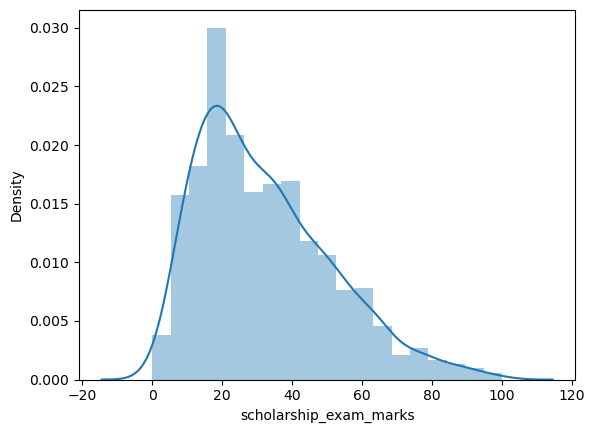

In [8]:
sns.distplot(df["scholarship_exam_marks"])   #shows it is a skewed distribution


<Axes: >

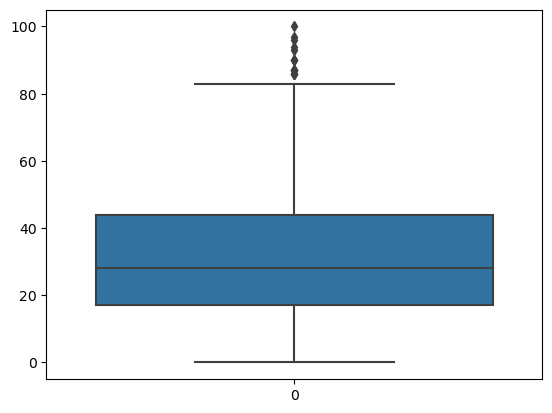

In [11]:
sns.boxplot(data["scholarship_exam_marks"])  #shows same thing as above but in boxplotting

In [46]:
Q1=df["scholarship_exam_marks"].quantile(0.25)
Q3=df["scholarship_exam_marks"].quantile(0.75)

In [47]:
Q1

17.0

In [48]:
Q3

44.0

In [49]:
IQR = Q3-Q1

In [50]:
IQR

27.0

In [42]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [51]:
min = Q1 - 1.5 * IQR
max = Q3 + 1.5 * IQR

In [53]:
min,max

(-23.5, 84.5)

In [55]:
df[(df["scholarship_exam_marks"]<min) | (df["scholarship_exam_marks"]>max)]  #outliers

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


### Trimming:

In [59]:
new_data = df[(df["scholarship_exam_marks"]>min) & (df["scholarship_exam_marks"]<max)]

In [61]:
new_data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


#### plotting this new data of no outliers

C:\Users\majhi\AppData\Local\Temp\ipykernel_10480\649811132.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\majhi\AppData\Local\Temp\ipykernel_10480\649811132.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simil

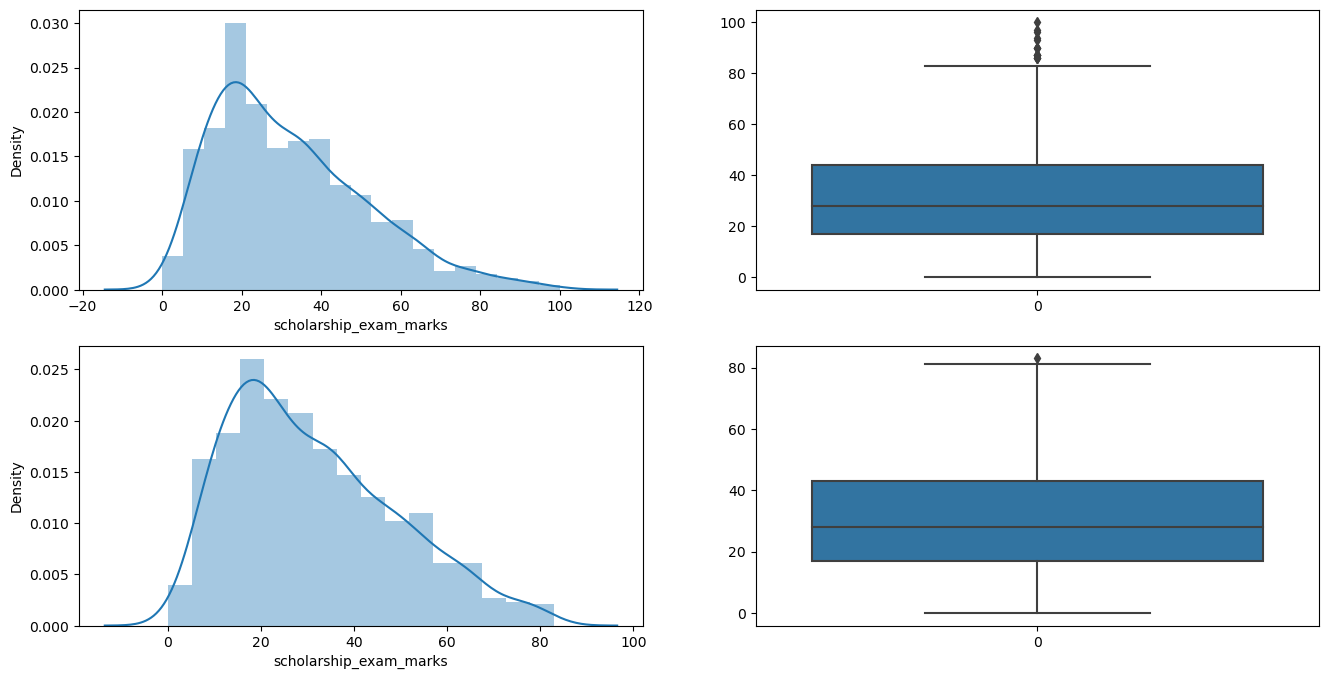

In [66]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(df["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data["scholarship_exam_marks"])

plt.show()

### Capping: 
(removing outliers using capping)

In [68]:
df["scholarship_exam_marks"]=np.where(df["scholarship_exam_marks"]>max, max, 
                                     np.where(df["scholarship_exam_marks"]<min, min, df["scholarship_exam_marks"]))

In [71]:
df.shape

(1000, 3)

<Axes: >

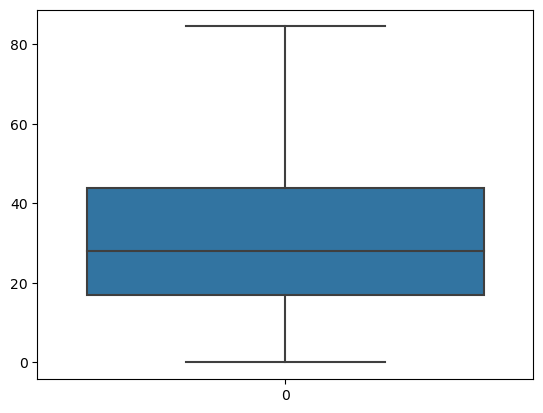

In [72]:
sns.boxplot(df["scholarship_exam_marks"])